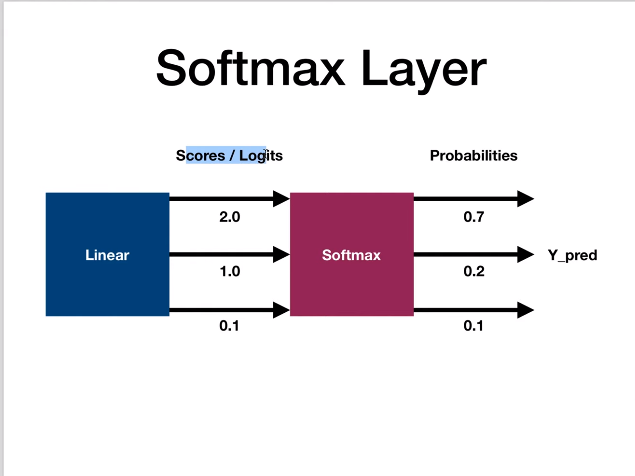

using pytorch we can compute it using `torch.softmax(x,dim=0)`.

In [3]:
import torch
import numpy as np
import torch.nn as nn

x = torch.rand(3)
torch.softmax(x,dim=0)

tensor([0.4367, 0.3390, 0.2242])

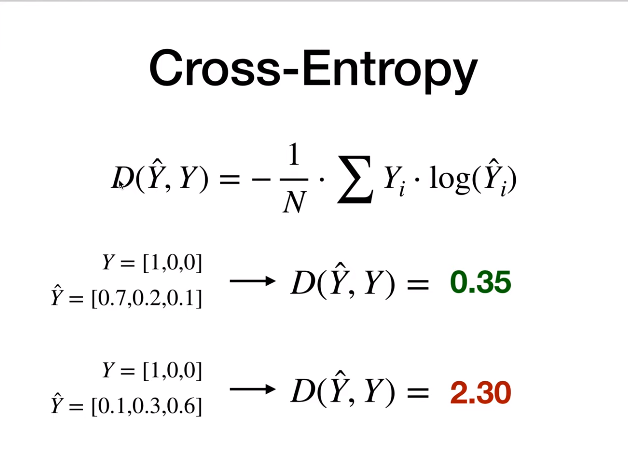

In [7]:
def cross_entropy(actual,predicted):
    loss = -np.sum(actual*np.log(predicted))
    return loss

Y = np.array([1,0,0])
Y_pred = np.array([0.7,0.2,0.1])
print(cross_entropy(Y,Y_pred))



0.35667494393873245


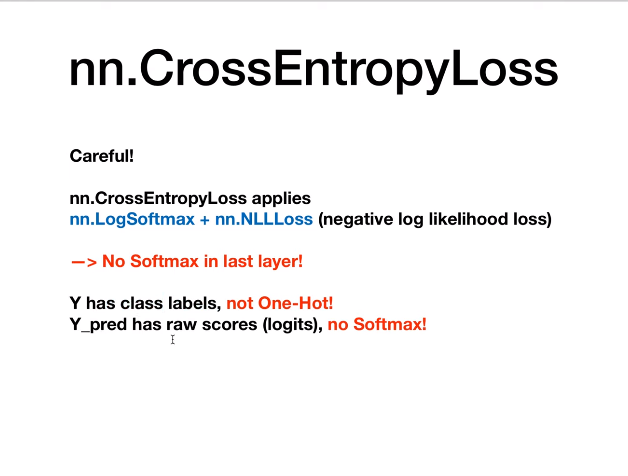

In pytorch we do not need to apply softmax as the last layer as we can notice in the below code the inputs are just scores and not the probabilities between 0 and 1. This is because `pytorch.CrossEntropyLoss()` applies the softmax before computing the loss hence we should only pass the scores and not the softmaxed probabilities.

In [12]:
# using pytorch

loss = nn.CrossEntropyLoss()
Y = torch.tensor([0,0])
# dimensions = n_samples x n_classes
Y_pred = torch.tensor([[2.0,1.0,0.1],[0.5,2.0,1.0]])
l = loss(Y_pred,Y)
print(l.item())

1.1906993389129639


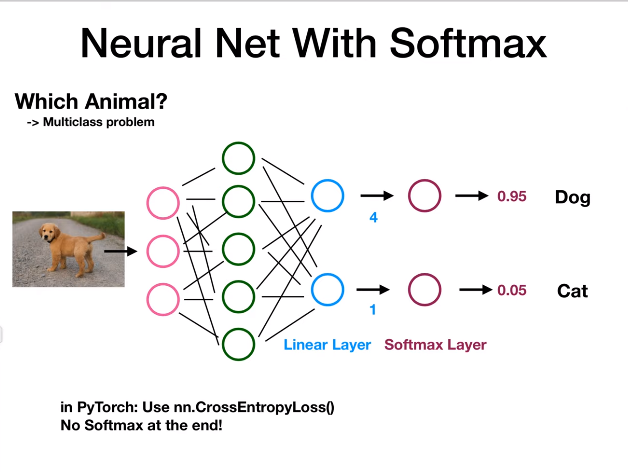

In [ ]:
class NeuralNet2(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size,num_classes)
    def forward(self,x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size = 28*28, hidden_size = 5, num_classes = 3)
criterion = nn.CrossEntropyLoss()

In case of binary cross entropy we use `nn.BCELoss()` but here we need to pass the sigmoid probability values unlike the `nn.CrossEntropyLoss()`